In [1]:
import shark_functions as func
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r"GSAF5.xls"
df_original = pd.read_excel(file_path)
df = df_original.copy()

In [2]:
df = func.clean_df(df)
df.head()

,date,year,type,country,state,location,activity,name,sex,age,injury,time,species,source
0,29 Jan-2024,2024.0,Unprovoked,AUSTRALIA,New South Wales,"Elizabeth Bay, Sydney Harbor",Swimming,Lauren O'Neill,F,29,Right leg bitten,20h00,Bull shark,"Nine News, 12/31/2024"
1,09-Jan-2024,2024.0,Unprovoked,AUSTRALIA,South Australia,"Walkers Beach, Elliston",Surfing,Murray Adams,M,64,Leg bitten,13h00,White shark,"A. Currie, GSAF"
2,28 Dec-2023,2023.0,Unprovoked,AUSTRALIA,South Australia,Ethel Beach,Surfing,Khai Cowley,M,15,FATAL,13h30,"White shark, 13'","S. DeMarchi, GSAF"
3,25 Dec-2023,2023.0,Unprovoked,AUSTRALIA,New South Wales,Old Bar,Surfing,Julian McLennan,M,16,Injury to right thigh,16h30,NaN,"9 News, 12/26/2023"
4,24-Dec-2023,2023.0,Unprovoked,AUSTRALIA,Western Australia,Wedge Island,Foil Boarding,Troy Brown,M,46,Puncture wounds to right ankle,15h00,Broze whaler?,"9 News, 12/25/2023"


In [3]:
df = func.map_type(df)
df["type_mapped"].value_counts()

type_mapped
Unprovoked    393
Provoked       41
Invalid        40
Watercraft     38
Name: count, dtype: int64

In [4]:
df = func.map_states(df)
state = df["state_mapped"].value_counts()
print(state)

print(df["state_mapped"].nunique())
print(df["state_mapped"].unique())

state_mapped
New South Wales                         189
Western Australia                       138
Queensland                               96
South Australia                          34
Victoria                                 34
Tasmania                                  9
Northern Territory                        9
Torres Strait                             2
Territory of Cocos (Keeling) Islands      1
Name: count, dtype: int64
9
['New South Wales' 'South Australia' 'Western Australia' 'Queensland'
 'Victoria' nan 'Tasmania' 'Northern Territory' 'Torres Strait'
 'Territory of Cocos (Keeling) Islands']


In [5]:
df = func.clean_time(df)
df = func.new_time(df)

In [6]:
df["time_of_day"] = df["time_of_day"].apply(func.categorize_time)
df["time_of_day"].unique()

array(['evening', 'afternoon', 'morning', 'invalid', 'night'],
      dtype=object)

In [7]:
df = func.sort_activity(df)
df["activity"].unique()

array(['swimming', 'surfing', 'other_activities', 'snorkeling', 'diving',
       'fishing', 'kayaking'], dtype=object)

In [8]:
df['species'] = df['species'].astype(str).str.lower()
df['species'] = df['species'].apply(func.simplify_species)
df['species'].unique()

array(['bull shark', 'white shark', 'other', 'copper shark',
       'lemon shark', 'wobbegong shark', 'tiger shark', 'blacktip shark',
       'not a shark attack', 'greynurse shark', 'grey reef shark',
       'tawny nurse shark', 'sevengill shark', 'not sure of species',
       'mako shark', 'blind shark', 'raggedtooth shark',
       'hammerhead shark'], dtype=object)

In [9]:
top_species = df['species'].value_counts().head(10)
top_species

species
other                  229
white shark            113
bull shark              35
copper shark            35
wobbegong shark         28
not a shark attack      23
tiger shark             14
grey reef shark         12
not sure of species      4
greynurse shark          4
Name: count, dtype: int64

In [10]:
# Filtered the 'not a shark attack' category from top_species
top_species_cleaned = top_species[top_species.index != 'not a shark attack']
print(top_species_cleaned)

species
other                  229
white shark            113
bull shark              35
copper shark            35
wobbegong shark         28
tiger shark             14
grey reef shark         12
not sure of species      4
greynurse shark          4
Name: count, dtype: int64


In [11]:
# see the null
null_values = df.isnull().sum()
null_values

date              0
year              0
type              2
country           0
state             2
location          5
activity          0
name              9
sex              26
age             141
injury            4
time              0
species           0
source            2
type_mapped       2
state_mapped      2
time_hour         0
time_of_day       0
dtype: int64

In [12]:
unique_values_count = df.nunique()
unique_values_count

date            490
year             24
type              6
country           1
state            15
location        450
activity          7
name            434
sex               3
age             120
injury          415
time            120
species          18
source          379
type_mapped       4
state_mapped      9
time_hour        20
time_of_day       5
dtype: int64

In [13]:
df['injury_category'] = df['injury'].apply(func.categorize_injury)
df['provoked_status'] = df['injury'].apply(func.categorize_injury)

# Identify the top 5 species by occurrence
top_species = df['species'].value_counts().nlargest(5).index

# Filtered the dataframe to only include the top 5 species
top_5_species = df[df['species'].isin(top_species)]

# Grouped by species and injury category, then counted the occurrences for the filtered dataset
species_injury_counts_top = top_5_species.groupby(['species', 'injury_category']).size().reset_index(name='counts')

species_injury_top_5 = species_injury_counts_top.pivot_table(index='species', columns='injury_category', values='counts', fill_value=0)

species_injury_top_5

injury_category,Fatal,Minor/No Injury,Severe,Unknown
species,,,,
bull shark,5,11,13,6
copper shark,0,12,9,14
other,14,121,40,54
white shark,26,45,27,15
wobbegong shark,0,7,9,12


In [14]:
unique_injury = df['injury_category'].unique()
unique_injury

array(['Severe', 'Fatal', 'Minor/No Injury', 'Unknown'], dtype=object)

In [15]:
# to correlate 'species' e 'injury_category'
species_injury_correlation = pd.crosstab(df['species'], df['injury_category'])

species_injury_correlation

injury_category,Fatal,Minor/No Injury,Severe,Unknown
species,,,,
blacktip shark,0,1,2,1
blind shark,0,0,1,0
bull shark,5,11,13,6
copper shark,0,12,9,14
grey reef shark,0,5,4,3
greynurse shark,0,1,0,3
hammerhead shark,0,0,0,1
lemon shark,0,3,1,0
mako shark,0,0,0,2


In [16]:
# Identificar as 5 localizações mais comuns de ataques
top_locations = df['location'].value_counts().head(5).index

# Filtrar o DataFrame para incluir apenas ataques nessas localizações
top_locations_data = df[df['location'].isin(top_locations)]

# Criar uma tabela cruzada para essas espécies, categorias de lesões, e localizações
species_injury_location_correlation = pd.crosstab(index=[top_locations_data['species'], top_locations_data['injury_category']],
                                                  columns=top_locations_data['location'])

species_injury_location_correlation
# Contar o número de ataques por localização e ordenar em ordem decrescente
attacks_by_location = df['location'].value_counts()

# Mostrar as top 5 localizações com mais ataques
top_attacks_locations = attacks_by_location

top_attacks_locations

location
Lennox Head                4
Sunshine Beach             3
Cid Harbor, Whitsundays    3
Lighthouse Beach           3
Crescent Head              3
                          ..
The Farm                   1
Moreton Bay                1
Kelpies near Wylie Bay     1
Weipa                      1
Adelaide                   1
Name: count, Length: 450, dtype: int64

In [17]:
species_injury_counts_top = top_5_species.groupby(['species', 'state_mapped']).size().reset_index(name='counts')

# Pivot the data for better readability: species as rows, state_mapped as columns, for the top species
species_injury_top_5 = species_injury_counts_top.pivot_table(index='species', columns='state_mapped', values='counts', fill_value=0)
species_injury_top_5

state_mapped,New South Wales,Northern Territory,Queensland,South Australia,Tasmania,Territory of Cocos (Keeling) Islands,Torres Strait,Victoria,Western Australia
species,,,,,,,,,
bull shark,10,1,15,0,0,0,0,0,9
copper shark,12,2,2,5,0,1,0,2,11
other,91,3,45,8,4,0,0,24,53
white shark,37,0,4,21,4,0,1,6,40
wobbegong shark,14,0,5,0,0,0,0,0,9


In [18]:
top_5_species.columns

Index(['date', 'year', 'type', 'country', 'state', 'location', 'activity',
       'name', 'sex', 'age', 'injury', 'time', 'species', 'source',
       'type_mapped', 'state_mapped', 'time_hour', 'time_of_day',
       'injury_category', 'provoked_status'],
      dtype='object')

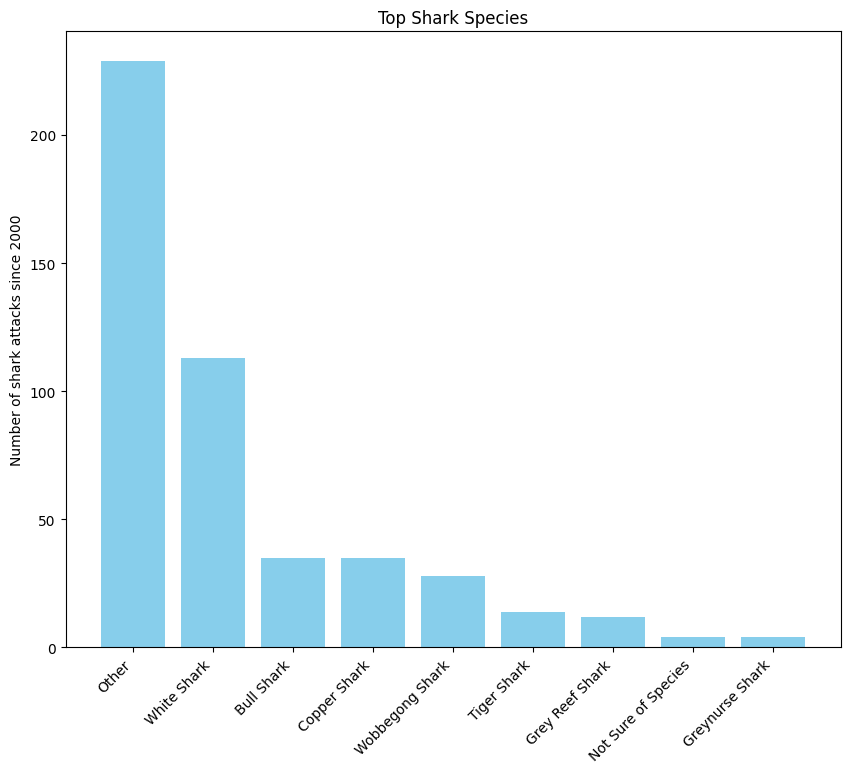

In [19]:

species = ['Other', 'White Shark', 'Bull Shark', 'Copper Shark', 'Wobbegong Shark',
                   'Tiger Shark', 'Grey Reef Shark', 'Not Sure of Species', 'Greynurse Shark']
counts = [229, 113, 35, 35, 28, 14, 12, 4, 4]  # Hypothetical counts after cleaning

# Plotting the cleaned data
plt.figure(figsize=(10, 8))
plt.bar(species, counts, color='skyblue')
plt.xticks(rotation=45, ha="right")
plt.ylabel('Number of shark attacks since 2000')
plt.title('Top Shark Species')
plt.show()

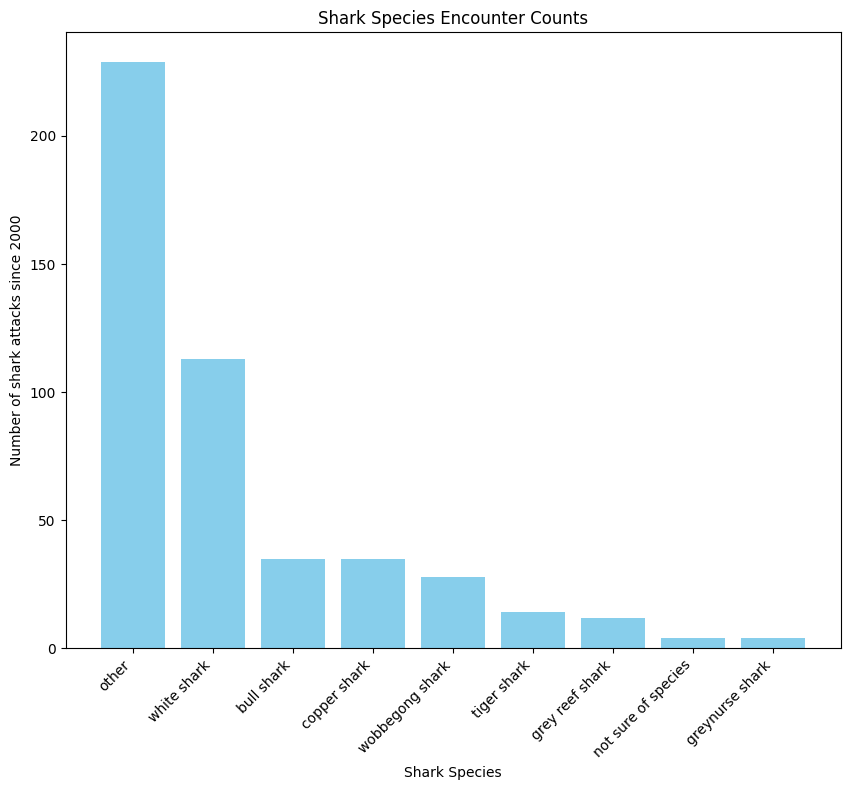

In [20]:
plt.figure(figsize=(10, 8))
plt.bar(top_species_cleaned.index, top_species_cleaned.values, color='skyblue')
plt.ylabel('Number of shark attacks since 2000')
plt.xlabel('Shark Species')
plt.xticks(rotation=45, ha="right")
plt.title('Shark Species Encounter Counts')
plt.show()

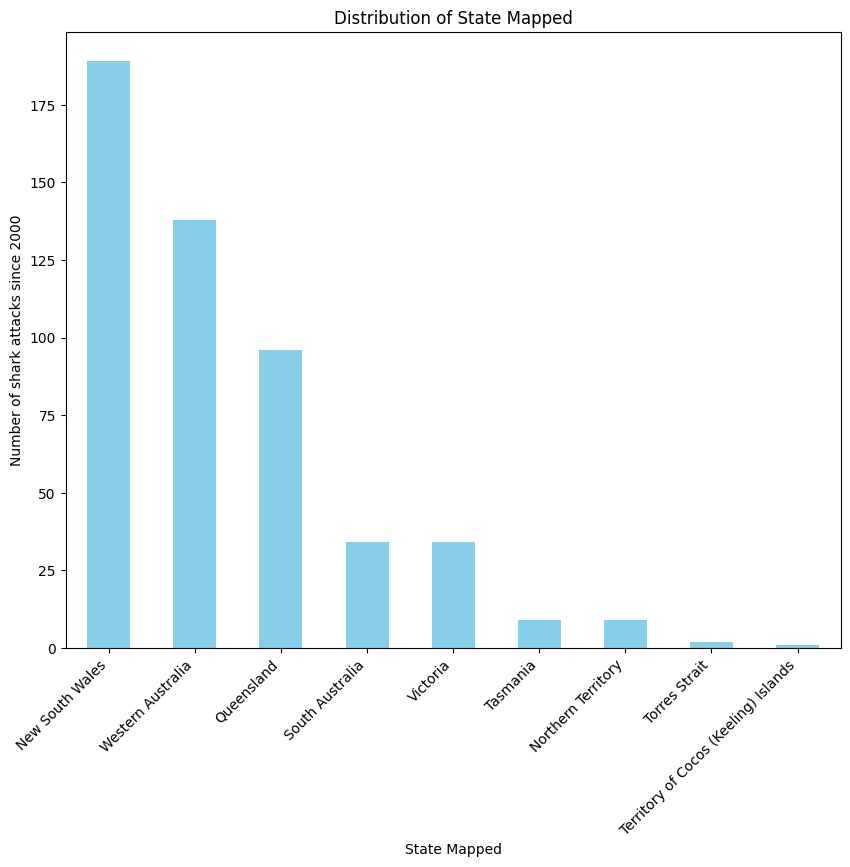

In [21]:
state_counts = df["state_mapped"].value_counts()

plt.figure(figsize=(10, 8))
state_counts.plot(kind='bar', color='skyblue')
plt.ylabel('Number of shark attacks since 2000')
plt.xlabel('State Mapped')
plt.xticks(rotation=45, ha="right")
plt.title('Distribution of State Mapped')
plt.show()

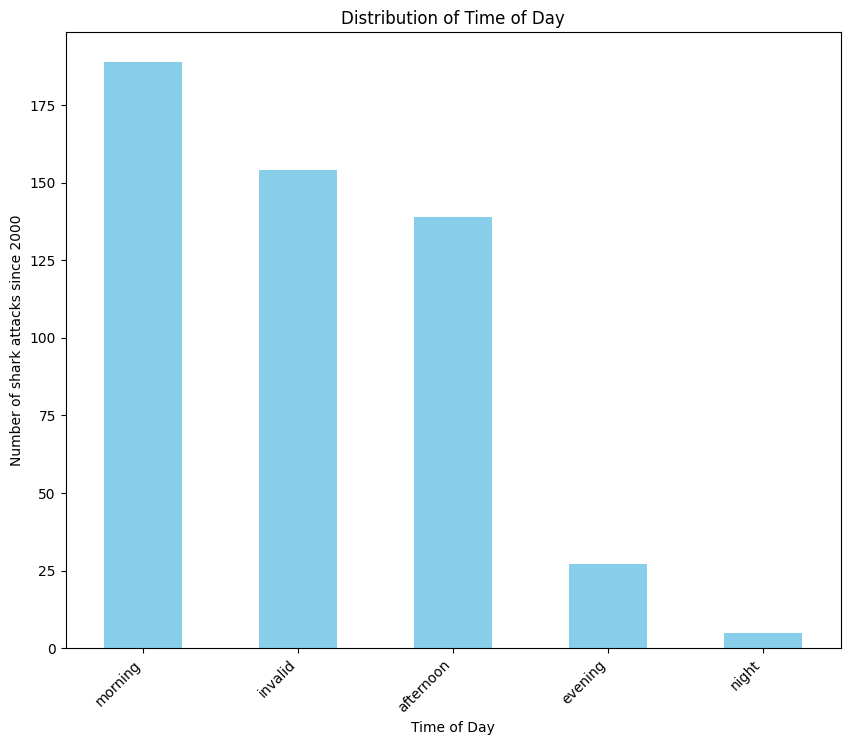

In [22]:
time_of_day_counts = df["time_of_day"].value_counts()
plt.figure(figsize=(10, 8))
time_of_day_counts.plot(kind='bar', color='skyblue')
plt.ylabel('Number of shark attacks since 2000')
plt.xlabel('Time of Day')
plt.xticks(rotation=45, ha="right")
plt.title('Distribution of Time of Day')
plt.show()

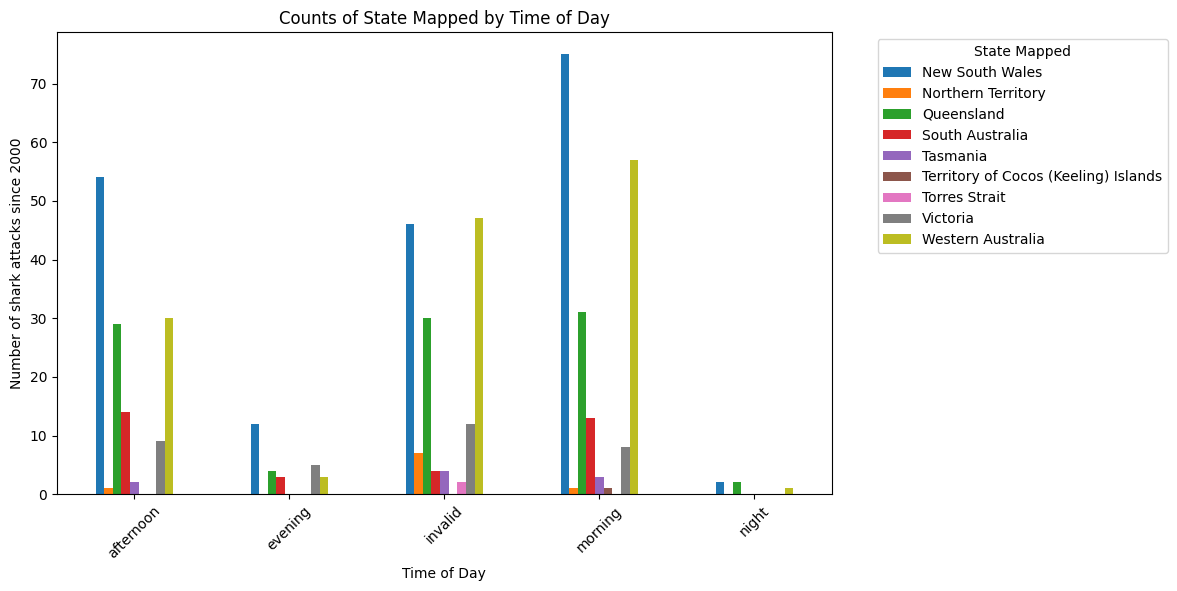

In [23]:
grouped_data = df.groupby(['time_of_day', 'state_mapped']).size().unstack(fill_value=0)


grouped_data.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Time of Day')
plt.ylabel('Number of shark attacks since 2000')
plt.title('Counts of State Mapped by Time of Day')
plt.xticks(rotation=45)

plt.legend(title='State Mapped', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

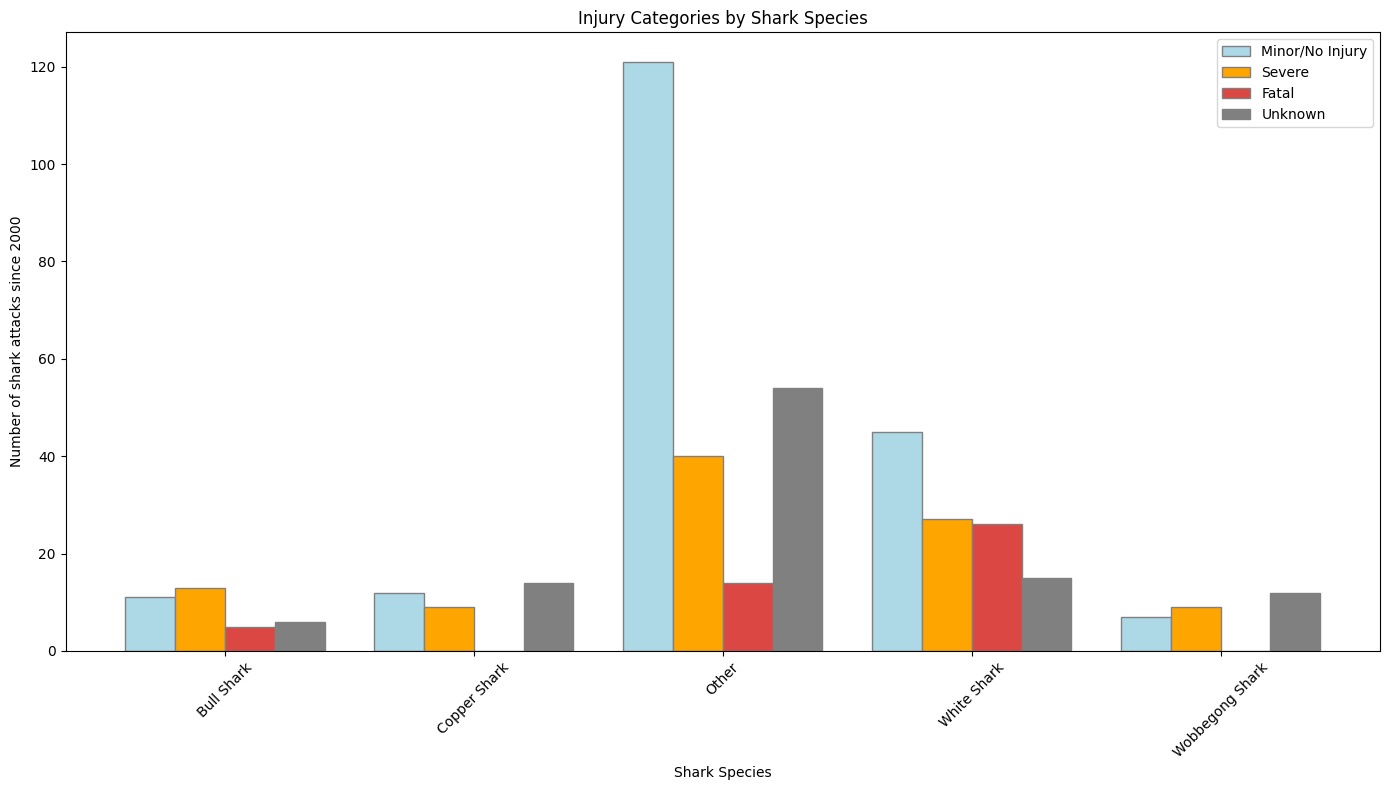

In [24]:
species = ['Bull Shark', 'Copper Shark', 'Other', 'White Shark', 'Wobbegong Shark']
fatal = [5, 0, 14, 26, 0]
minor_no_injury = [11, 12, 121, 45, 7]
severe = [13, 9, 40, 27, 9]
unknown = [6, 14, 54, 15, 12]

bar_width = 0.2

r1 = np.arange(len(species))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

plt.figure(figsize=(14, 8))
plt.bar(r1, minor_no_injury, color='lightblue', width=bar_width, edgecolor='grey', label='Minor/No Injury')
plt.bar(r2, severe, color='orange', width=bar_width, edgecolor='grey', label='Severe')
plt.bar(r3, fatal, color='#db4742', width=bar_width, edgecolor='grey', label='Fatal')
plt.bar(r4, unknown, color='grey', width=bar_width, edgecolor='grey', label='Unknown')

plt.xlabel('Shark Species')
plt.ylabel('Number of shark attacks since 2000')
plt.title('Injury Categories by Shark Species')
plt.xticks([r + bar_width*1.5 for r in range(len(species))], species, rotation=45)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


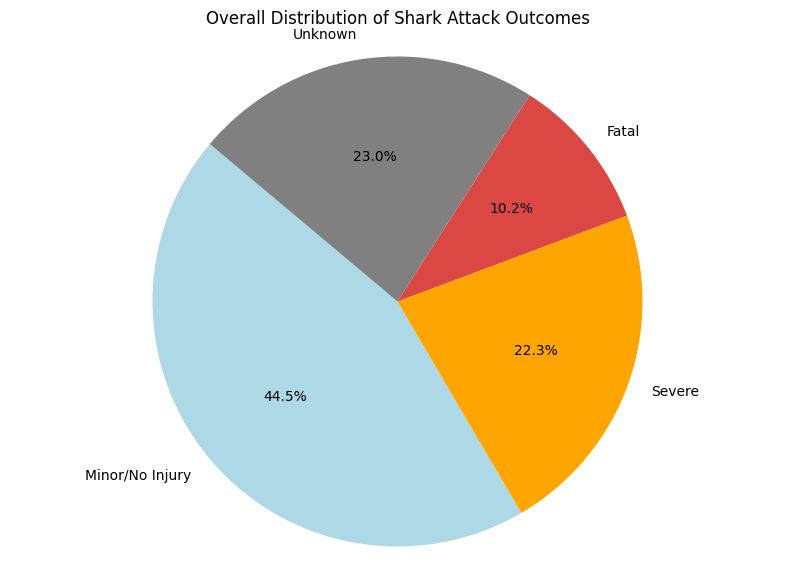

In [25]:
species = ['Bull Shark', 'Copper Shark', 'Other', 'White Shark', 'Wobbegong Shark']
fatal = [5, 0, 14, 26, 0]
minor_no_injury = [11, 12, 121, 45, 7]
severe = [13, 9, 40, 27, 9]
unknown = [6, 14, 54, 15, 12]

total_fatal = sum(fatal)
total_minor_no_injury = sum(minor_no_injury)
total_severe = sum(severe)
total_unknown = sum(unknown)

labels = ['Minor/No Injury', 'Severe', 'Fatal', 'Unknown']
sizes = [total_minor_no_injury, total_severe, total_fatal, total_unknown]
colors = ['lightblue', 'orange', '#db4742', 'grey']

plt.figure(figsize=(10, 7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Overall Distribution of Shark Attack Outcomes')
plt.axis('equal')
plt.show()

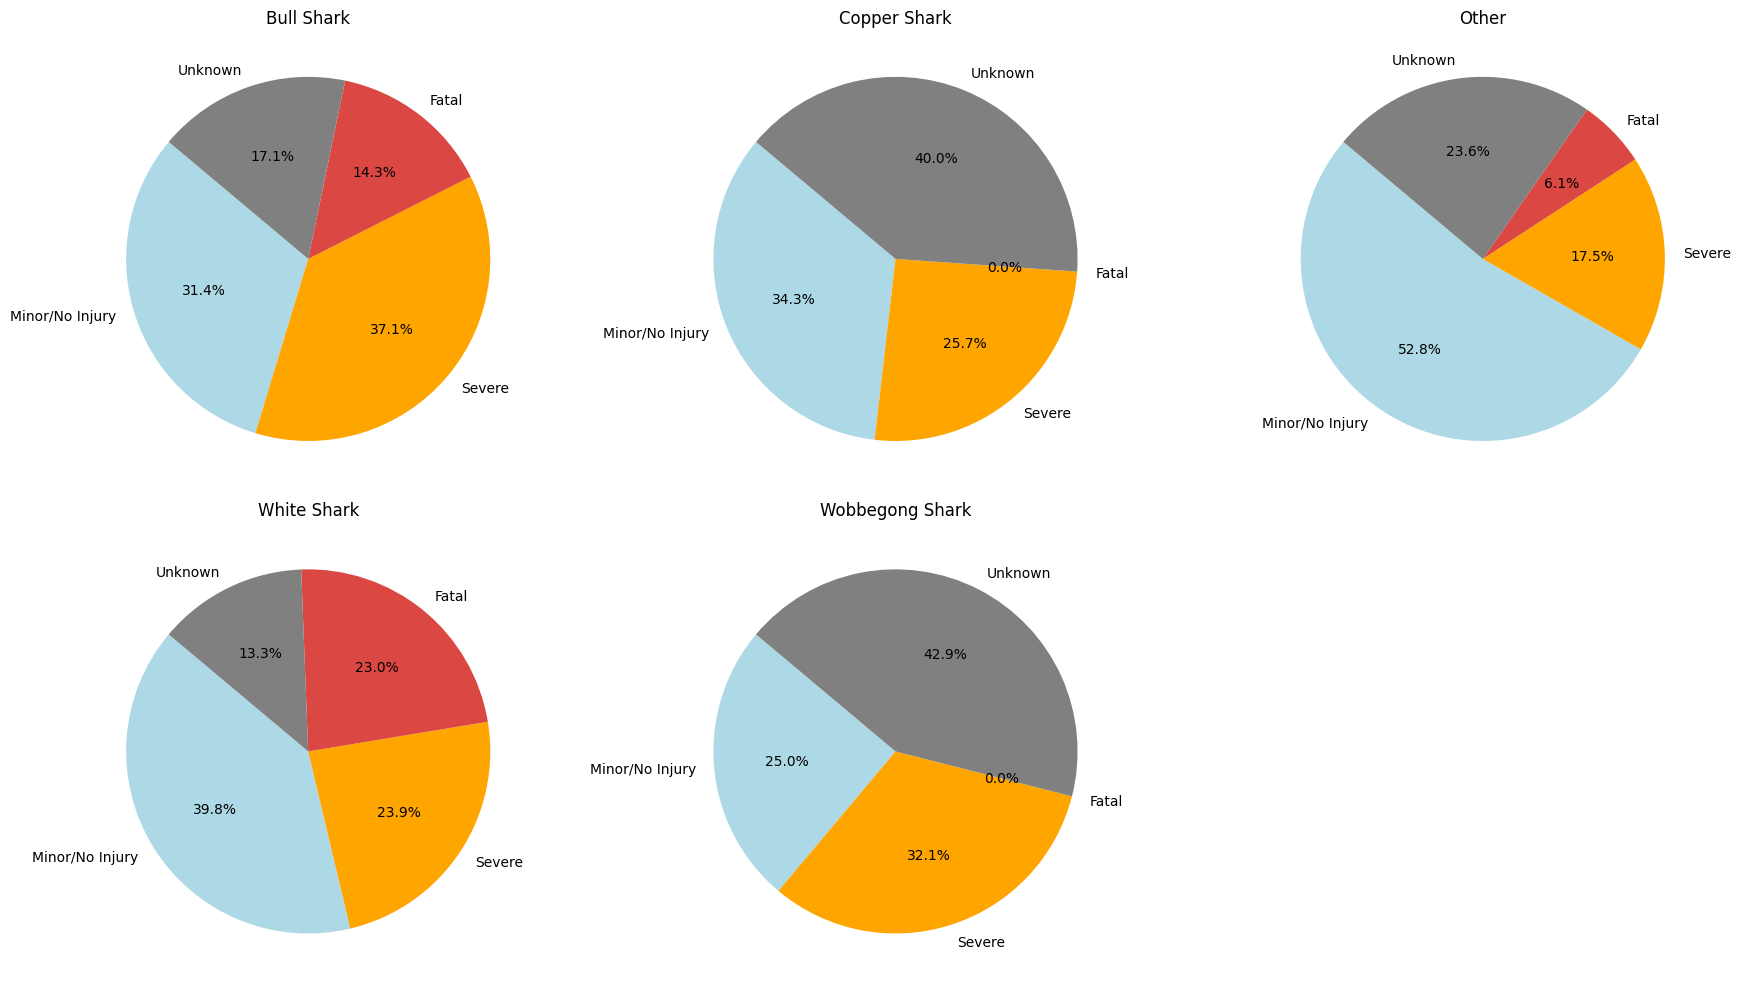

In [26]:
plt.figure(figsize=(18, 10))

for i, species_name in enumerate(species):
    plt.subplot(2, 3, i+1)
    sizes = [minor_no_injury[i], severe[i], fatal[i], unknown[i]]
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.title(species_name)

plt.tight_layout()
plt.show()